## Subjective Value Reformulated
Only thought through value in positive space.
$$p : [0,1]$$

$$ p_{50}(p) = 2|p-.5|$$
$$ p_{100}(p) = 2(1-p)$$
$$ p_{0}(p) = 2p$$

$$α : (0,∞)$$ but pure tolerance to risk is at $α=1$
$$β : (0,1]$$
but pure tolerance to ambiguity is at $β=1$.
$$A : [0,1]$$
$$ p_s(p | β, A)=   \left\{
\begin{array}{ll}
      p &: \space A=0 \\
      .5β^A &: A \ge p_{50} \\
      (1-\frac{A}{2})β^A &: A \ge p_{100}  \space no \space blending \\
      (\frac{A}{2})β^A &: A \ge p_{0}  \space no \space blending \\
      pβ^A &: A<p_{50} \space no \space blending \\
      (p \times (\frac{p_{50}-A}{p_{50}}) + .5\times(1-\frac{p_{50}-A}{p_{50}}))β^A &: A<p_{50} \space straight \space blending  \\
      p^{\frac{p_{50}-A}{p_{50}}} \times .5^{1-\frac{p_{50}-A}{p_{50}}}β^A &: A<p_{50} \space curved \space blending \\
\end{array} 
\right.  $$

The Experiment Relevant version (experiment always has 50/50 ambiguity trials, so $p_{50}$ is 0:
$$ p_s(p | β, A)=   \left\{
\begin{array}{ll}
      p &: \space A=0 \\
      .5β^A &: A > 0 \\
\end{array} 
\right.  $$


$$SV(v | α, p_s)=p_s v α^{(1-p_s)}$$

In [139]:
import numpy as np
import pylab as plt

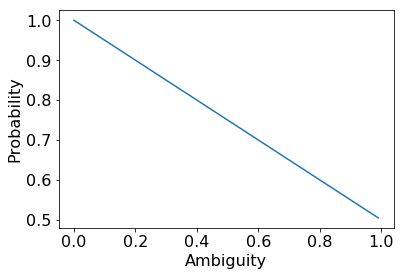

1.0 1.0


In [262]:
# straight blend p to 50% as ambiguity rises to avoid the jarring jump 
#  of switching which candy wrappers are grey once A reaches p50
p = 1
p50 = abs(p-.5)*2
p100 = (1-p)*2
p0 = p*2

ambs = np.arange(0, 1, .01)
#vals = [p**(max(0,(p50-amb)/p50))*.5**(min(1,1-(p50-amb)/p50)) for amb in ambs]
vals = [p*(max(0,(p50-amb)/p50)) + .5*(min(1,1-(p50-amb)/p50)) for amb in ambs]
plt.plot(ambs, vals)
plt.xlabel("Ambiguity")
plt.ylabel("Probability")
plt.show()
print(vals[0], p50)

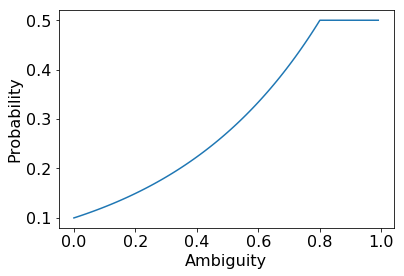

0.1 0.8


In [215]:
# blend p to 50% as ambiguity rises to avoid the jarring jump 
#  of switching which candy wrappers are grey once A reaches p50
p = 0.1
p50 = 2*abs(p-.5)
p100 = (1-p)*2
p0 = p*2

ambs = np.arange(0, 1, .01)
vals = [p**(max(0,(p50-amb)/p50))*.5**(min(1,1-(p50-amb)/p50)) for amb in ambs]
#vals = [p*(max(0,(p50-amb)/p50)) + .5*(min(1,1-(p50-amb)/p50)) for amb in ambs]
plt.plot(ambs, vals)
plt.xlabel("Ambiguity")
plt.ylabel("Probability")
plt.show()
print(vals[0], p50)

In [264]:
p = .6
amb = .25
beta = .5
#alpha = 1

def apparent_p(p, amb, beta, blending=1):
    if amb==0:
        return p
    p50 = 2*abs(p-.5)
    p100 = (1-p)*2
    p0 = p*2
    
    if amb >= p50: # probability is near enough to 50% that ambiguity 
                     #  can wrap around 50 and still obscure the probability.
        # p with high ambiguity averages to .5
        #  the experiment always uses this for ambiguity trials
        return .5*beta**amb
    elif blending == 0 and amb >= p100: # probability is very large, ambiguity is large enough to push on the upper boundary
        return (1-amb/2)*beta**amb
    elif blending == 0 and amb >= p0: # probability is very small, ambiguity is large enough to push on the lower boundary

        return (amb/2)*beta**amb
    else:
        # p with low ambiguity could averages to p, so amb doesn't affect p without Beta != 1
        #  however, in practice that causes a very sudden shift once it hits p50 
        #  and wrapper colors while considering the "candy plate"
        if blending == 0:
            return p*beta**amb
        elif blending == 1:
            blended_p = p*((p50-amb)/p50) + .5*(1-(p50-amb)/p50)
            return blended_p *beta**amb
        blended_p = p**((p50-amb)/p50)*.5**(1-(p50-amb)/p50)
        return blended_p *beta**amb


def sv(v, alpha, apparent_p):
    return apparent_p * v * alpha**(1-apparent_p)

def sv_qp(v, params):
    alpha, beta, probability, ambiguity = params
    return sv(v, alpha, apparent_p(probability, ambiguity, beta))


In [277]:
amb = .5
p50 = 2*abs(1-.5)
p=1
print(p50, amb)
print("larger than 50% because there's still 50% that's definitely winnings")
print(sv(50, 1, apparent_p(1, amb, .5)), apparent_p(1, amb, 0.5))


1.0 0.5
larger than 50% because there's still 50% that's definitely winnings
26.516504294495537 0.5303300858899107
44.4227835994022 0.5303300858899107


In [220]:

print("Reasonable alpha")
print(sv(50, 1, 1))
print(sv(50, 1, .5))
print(sv(50, 1.2, .5))
print(sv(50, .8, .5))
print("Ambiguity")
print(sv(50, 1, apparent_p(1, amb, beta)), apparent_p(1, amb, beta))
print(sv(50, 1, apparent_p(.5, amb, beta)))
print(sv(50, 1.2, apparent_p(.5, amb, beta)))
print(sv(50, .8, apparent_p(.5, amb, beta)))
print("Low Alpha")
print(sv(50, .5, 1))
print(sv(50, .5, .5))
print(sv(50, .6, .5))
print(sv(50, .1, .5))
print("Ambiguity")
print(sv(50, .5, apparent_p(1, amb, beta)))
print(sv(50, .5, apparent_p(.5, amb, beta)))
print(sv(50, .6, apparent_p(.5, amb, beta)))
print(sv(50, .1, apparent_p(.5, amb, beta)))
print("High Alpha")
print(sv(50, 1.5, 1))
print(sv(50, 1.5, .5))
print(sv(50, 1.6, .5))
print(sv(50, 1.1, .5))
print("Ambiguity")
print(sv(50, 1.5, apparent_p(1, amb, beta)))
print(sv(50, 1.5, apparent_p(.5, amb, beta)))
print(sv(50, 1.6, apparent_p(.5, amb, beta)))
print(sv(50, 1.1, apparent_p(.5, amb, beta)))

Reasonable alpha
50
25.0
27.386127875258303
22.360679774997898
Ambiguity
36.78921816735001 0.7357843633470001
21.022410381342862
23.36534203348644
18.472179411193906
Low Alpha
50.0
17.67766952966369
19.364916731037084
7.905694150420948
Ambiguity
30.63259058706209
14.067600815536238
15.635424229814735
5.5351668596909365
High Alpha
50.0
30.618621784789724
31.622776601683793
26.22022120425379
Ambiguity
40.94931323510799
26.591112937693406
27.60454617044861
22.216299146246172


In [221]:
amb = .5
print("Reasonable alpha")
print(sv(50, 1, 1))
print(sv(50, 1, .5))
print(sv(50, 1.2, .5))
print(sv(50, .8, .5))
print("Ambiguity")
print(sv(50, 1, apparent_p(1, amb, beta)))
print(sv(50, 1, apparent_p(.5, amb, beta)))
print(sv(50, 1.2, apparent_p(.5, amb, beta)))
print(sv(50, .8, apparent_p(.5, amb, beta)))
print("Low Alpha")
print(sv(50, .5, 1))
print(sv(50, .5, .5))
print(sv(50, .6, .5))
print(sv(50, .1, .5))
print("Ambiguity")
print(sv(50, .5, apparent_p(1, amb, beta)))
print(sv(50, .5, apparent_p(.5, amb, beta)))
print(sv(50, .6, apparent_p(.5, amb, beta)))
print(sv(50, .1, apparent_p(.5, amb, beta)))
print("High Alpha")
print(sv(50, 1.5, 1))
print(sv(50, 1.5, .5))
print(sv(50, 1.6, .5))
print(sv(50, 1.1, .5))
print("Ambiguity")
print(sv(50, 1.5, apparent_p(1, amb, beta)))
print(sv(50, 1.5, apparent_p(.5, amb, beta)))
print(sv(50, 1.6, apparent_p(.5, amb, beta)))
print(sv(50, 1.1, apparent_p(.5, amb, beta)))

Reasonable alpha
50
25.0
27.386127875258303
22.360679774997898
Ambiguity
26.516504294495537
17.67766952966369
19.888931815022673
15.303045217696885
Low Alpha
50.0
17.67766952966369
19.364916731037084
7.905694150420948
Ambiguity
19.14835796384908
11.293412486095852
12.706081563408393
3.9900505833460684
High Alpha
50.0
30.618621784789724
31.622776601683793
26.22022120425379
Ambiguity
32.079015871203474
22.975163369274778
23.953979940873104
18.801096209739207


In [218]:
import numpy as np
arange = np.arange
ambiguity_space = [.24, .5, .74]
probability_space = [.13, .25, .38, .5, .75]
steps = 4

def round_fiddy(n):
    return np.round(n*2, 0)/2

def make_sample_sv_ranges(alpha, beta, probability, ambiguity, steps, value_max=50):
    sv_max = value_max
    sv_se = sv(value_max, alpha, apparent_p(probability, ambiguity, beta))
    sv_min = max(.5, round_fiddy(sv_se/2))
    
    # make room to exclude the sv_min (safe) from the range
    ss = (sv_max-sv_min)/(2*(steps+.5)-1)
    
    space = arange(sv_min, sv_max+ss/2, ss)
    space = [round_fiddy(v) for i,v in enumerate(space) if i!=0]
    # sv_half is NOT the safe value in this: sv_min is.
    sv_half = (space[-1]+space[0])/2
    return space, sv_min, sv_half
    
    

In [179]:
make_sample_sv_ranges(1,.1,.5,.05,4)

([16.0, 21.0, 25.5, 30.5, 35.5, 40.0, 45.0, 50.0], 11.0, 33.0)

In [180]:
alphas = arange(0.01,2.01,.025)
alphas = np.round(alphas,2)
    
svs = []
moneys = []
beta = 1
amb = 0.0
prob = .5

lot_svs_lines = []
lot_money_lines = []
lot_svs_lines_recomp = []
for i in range(8):
    lot_svs_lines.append([])
    lot_money_lines.append([])
    lot_svs_lines_recomp.append([])

safe_svs_line = []
safe_money_line = []
sv_half_money_line = []
space = None
for alpha in alphas:
    space, safe, sv_half = make_sample_sv_ranges(alpha, beta, prob, amb, 4);
    sv_half_money_line.append(sv_half)
    #safe_svs_line.append(sv_half);
    safe_money_line.append(safe);
    #safe_sv = safe_to_sv(safe, alpha);
    #safe_svs_line_recomp.append(safe_sv);
    for i, lott in enumerate(space):
        #lott = sv_to_money(lott_sv, domain, alpha, beta, prob, amb);    
        #lot_svs_lines[i].append(lott_sv);
        lot_money_lines[i].append(lott);
        #var lot_sv = lottery_to_sv(lott, alpha, beta, prob, amb)
        #lot_svs_lines_recomp[i].append(lot_sv);

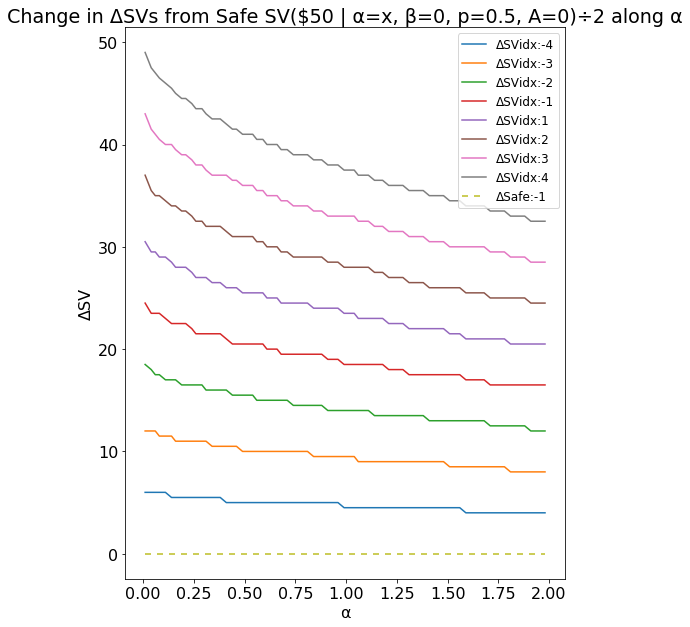

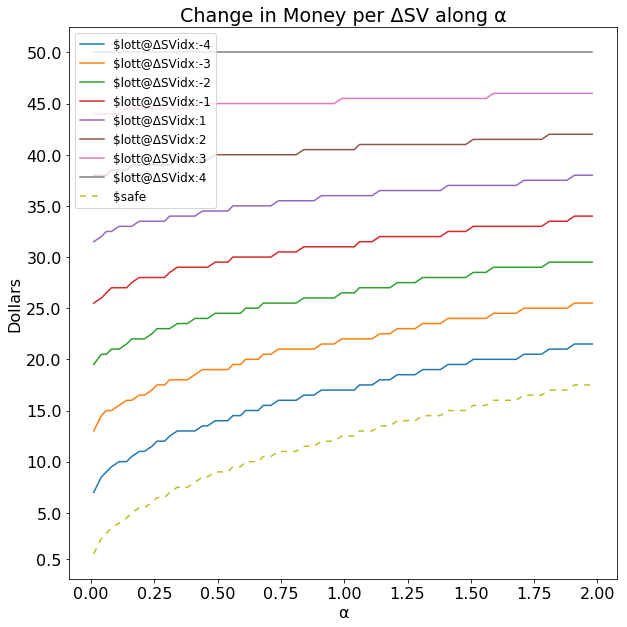

In [181]:
import pylab as plt
import numpy as np
# SVs
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx>=0:
        idx+=1
    plt.plot(alphas, np.array(lot_money_lines)[i]-np.array(safe_money_line), label="ΔSVidx:"+str(idx))
plt.plot(alphas, np.array(safe_money_line)-np.array(safe_money_line), dashes=[4,4], label="ΔSafe:-1")
plt.rcParams.update({'font.size': 12})
plt.legend()

plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 16})
plt.title("Change in ΔSVs from Safe SV($50 | α=x, β=0, p=0.5, A=0)÷2 along α")
plt.tight_layout()
plt.show()

# money
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx>=0:
        idx+=1
    plt.plot(alphas, np.array(lot_money_lines)[i], label="$lott@ΔSVidx:"+str(idx))
plt.plot(alphas, np.array(safe_money_line), dashes=[4,4], label="$safe")

plt.rcParams.update({'font.size': 12})
plt.xlabel("α")
plt.ylabel("Dollars")
money = np.arange(0., 50.5, 5)
money[0] = .5
#money = ["${0:0.02f}".format(i) for i in money]
#plt.gca().yaxis.set_major_formatter('${x:1.2f}')
plt.yticks(money)
plt.legend(loc = 'upper left')
plt.rcParams.update({'font.size': 16})
plt.title("Change in Money per ΔSV along α")
plt.tight_layout()
plt.show()

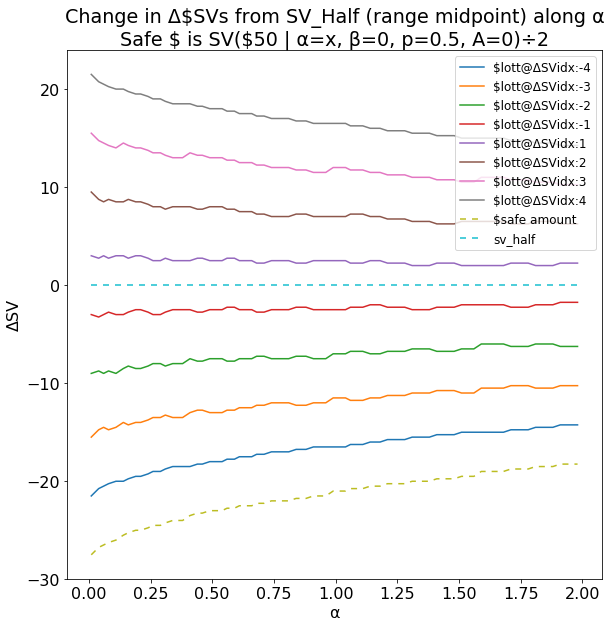

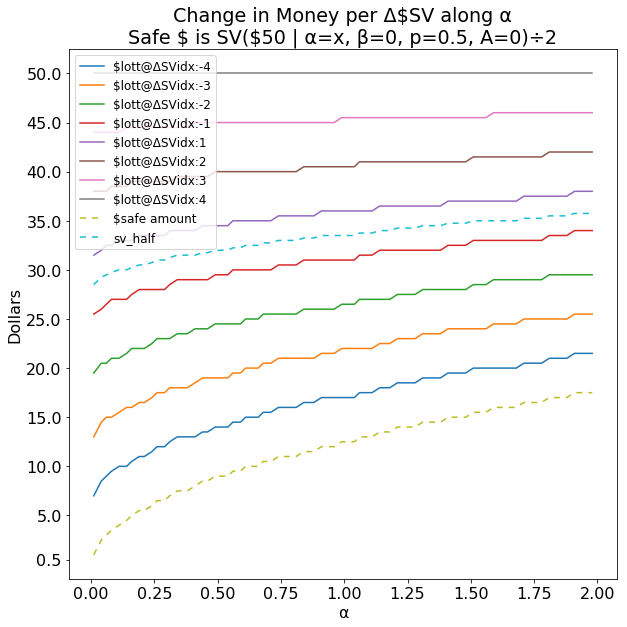

In [182]:
# the same, but compared to sv_half, which is not the safe value
import pylab as plt
import numpy as np
# SVs
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx>=0:
        idx+=1
    plt.plot(alphas, np.array(lot_money_lines)[i]-np.array(sv_half_money_line), label="$lott@ΔSVidx:"+str(idx))
plt.plot(alphas, np.array(safe_money_line)-np.array(sv_half_money_line), dashes=[4,4], label="$safe amount")
plt.plot(alphas, np.array(sv_half_money_line)-np.array(sv_half_money_line), dashes=[4,4], label="sv_half")
plt.rcParams.update({'font.size': 12})
plt.legend()

plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 16})
plt.title("Change in Δ$SVs from SV_Half (range midpoint) along α\nSafe \$ is SV($50 | α=x, β=0, p=0.5, A=0)÷2")
plt.tight_layout()
plt.show()

# money
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx>=0:
        idx+=1
    plt.plot(alphas, np.array(lot_money_lines)[i], label="$lott@ΔSVidx:"+str(idx))
plt.plot(alphas, np.array(safe_money_line), dashes=[4,4], label="$safe amount")
plt.plot(alphas, np.array(sv_half_money_line), dashes=[4,4], label="sv_half")


plt.rcParams.update({'font.size': 12})
plt.xlabel("α")
plt.ylabel("Dollars")
money = np.arange(0., 50.5, 5)
money[0] = .5
#money = ["${0:0.02f}".format(i) for i in money]
#plt.gca().yaxis.set_major_formatter('${x:1.2f}')
plt.yticks(money)
plt.legend(loc = 'upper left')
plt.rcParams.update({'font.size': 16})
plt.title("Change in Money per Δ$SV along α\nSafe \$ is SV($50 | α=x, β=0, p=0.5, A=0)÷2")
plt.tight_layout()
plt.show()

# Make schedule

In [273]:
alpha = 4
beta = .5
steps = 4
random = np.random

trials = {"crdm_lott_sv":[], "crdm_safe_sv":[], "crdm_lott":[], "crdm_sure_amt":[], 
          "crdm_lott_p":[], "crdm_amb_lev":[], "crdm_delta_sv":[], 
          "crdm_domain":[], #"crdm_true_lott_sv":[], "crdm_true_sure_sv":[], "crdm_true_delta_sv":[], 
          "crdm_sv_half":[], "crdm_quad_idx":[], }

parseInt = int


def append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, prob, amb, sv_half, domain, choice_idx):
    trials["crdm_lott_sv"].append(lott_sv)
    trials["crdm_safe_sv"].append(safe_sv)
    trials["crdm_lott"].append(lott)
    trials["crdm_sure_amt"].append(safe)
    trials["crdm_lott_p"].append(prob)
    trials["crdm_amb_lev"].append(amb)
    trials["crdm_delta_sv"].append(lott_sv-sv_half)
    trials["crdm_sv_half"].append(sv_half)
    #true_safe_sv = safe_to_sv(safe, alpha)
    #true_lottery_sv = lottery_to_sv(lott, alpha, beta, prob, amb)
    #trials["crdm_true_lott_sv"].append(true_lottery_sv)
    #trials["crdm_true_sure_sv"].append(true_safe_sv)
    #trials["crdm_true_delta_sv"].append(true_lottery_sv-true_safe_sv)
    trials["crdm_domain"].append(domain)
    trials["crdm_quad_idx"].append(choice_idx)


def generate_trials(trials, alpha, beta, steps):
    # trials per unique probability and ambiguity
    trials_per = 9
    
    choice_idxs = [0,1,2,3,3.5,4,5,6,7]
    #choice_idxs = [0,1,2,3,3.5,4,5,6,7]
    delta_idx = arange(8)
    ambiguity_space = [.24, .5, .74]
    probability_space = [.13, .25, .38, .5, .75]
    #tmp = get_standard_range(domain, probability_space, ambiguity_space, alpha, beta, steps)
    #print(sum(trials_remaining_per_sv_delta))
    for prob in probability_space: # probability trials, no ambiguity
        svs, sv_min, sv_half = make_sample_sv_ranges(alpha, beta, prob, 0, steps)
        
        for tidx in range(trials_per):
            choice_idx = choice_idxs[tidx]
            if (choice_idx != parseInt(choice_idx)):
                inty = parseInt(choice_idx)
                odds = choice_idx-parseInt(choice_idx)
                choice_idx = random.choice([inty,inty+1], p=[1-odds, odds])
            
            subspace_sv = svs[choice_idx]
            lott_sv = subspace_sv
            safe_sv = sv_min
            lott = lott_sv
            safe = safe_sv
            
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, prob, 0, sv_half, 1, choice_idx)

    for amb in ambiguity_space: # ambiguity trials, prob at 0.5
        svs, sv_min, sv_half = make_sample_sv_ranges(alpha, beta, 0.5, amb, steps)
        
        for tidx in range(trials_per):
            choice_idx = choice_idxs[tidx]
            if (choice_idx != parseInt(choice_idx)):
                inty = parseInt(choice_idx)
                odds = choice_idx-parseInt(choice_idx)
                choice_idx = random.choice([inty,inty+1], p=[1-odds, odds])
            

            subspace_sv = svs[choice_idx]
            lott_sv = subspace_sv
            safe_sv = sv_min
            lott = lott_sv
            safe = safe_sv
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, 0.5, amb, sv_half, 1, choice_idx)
generate_trials(trials, alpha, beta, steps)

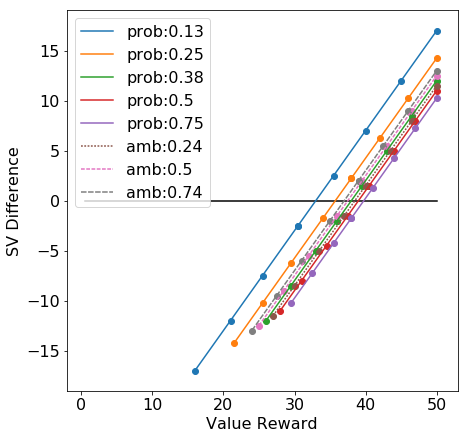

In [274]:
import pandas as pd
import pylab as plt

df = pd.DataFrame(trials)
gain = df.query("crdm_domain == 1")
plt.figure(figsize=(7,7))
plt.plot([0.5,50], [0,0], color="black")
prob_trials = gain.query("crdm_amb_lev == 0")
prob = np.unique(prob_trials["crdm_lott_p"].values)

for p in prob:
    trial_set = prob_trials.query("crdm_lott_p == @p")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sva = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sva[idx], label="prob:"+str(p))
    plt.scatter(money[idx], sva[idx])
amb_trials = gain.query("crdm_amb_lev != 0")
amb = np.unique(amb_trials["crdm_amb_lev"].values)
for a in amb:
    trial_set = amb_trials.query("crdm_amb_lev == @a")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sva = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sva[idx], label="amb:"+str(a), dashes=[5*a,1])
    plt.scatter(money[idx], sva[idx])
plt.xlabel("Value Reward")
plt.ylabel("SV Difference")
plt.legend()
plt.show()


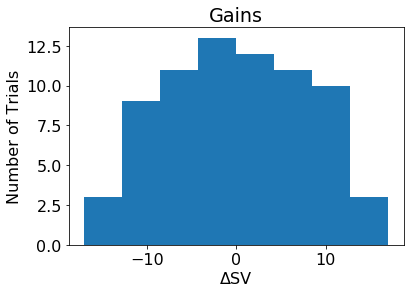

In [275]:
import pylab as plt
import pandas as pd
df = pd.DataFrame(trials)

bins = 8
gain = df.query("crdm_domain == 1")["crdm_delta_sv"].values
plt.hist(gain, bins=bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("Gains")
plt.show()


